In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Data/data.csv")
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
batch_ = data[data['y']==1]
first_batch = batch_.iloc[:10]
first_batch

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
11,X21.V1.724,-167,-230,-280,-315,-338,-369,-405,-392,-298,...,423,434,416,374,319,268,215,165,103,1
20,X23.V1.964,410,451,491,541,581,641,736,757,692,...,415,428,463,510,562,607,667,748,763,1
22,X11.V1.134,-264,-189,-117,-45,20,70,111,143,161,...,-231,-221,-248,-321,-444,-530,-548,-536,-486,1
23,X18.V1.544,-4,40,78,123,149,185,197,189,167,...,-189,-214,-226,-224,-203,-171,-129,-85,-40,1
24,X19.V1.294,593,328,88,-106,-456,-732,-921,-782,-522,...,312,360,421,445,413,310,177,41,-71,1
27,X3.V1.744,-340,-381,-376,-336,-275,-204,-131,-70,-16,...,114,-39,-185,-293,-351,-379,-380,-350,-308,1
30,X20.V1.374,-31,-10,5,9,9,2,-13,-42,-77,...,-8,13,39,45,45,45,38,35,15,1
42,X18.V1.916,512,351,-90,-534,-944,-1002,-795,-292,286,...,-747,16,422,622,610,371,-99,-652,-1089,1


In [4]:
first_batch_ = first_batch[first_batch.columns[1:6]]

In [5]:
from CreateGraph import Graph 
from CreateGraph import Vertex 
from CreateGraph import shortest_
from Dijkstra import dijkstra

(0.0, 30.0)

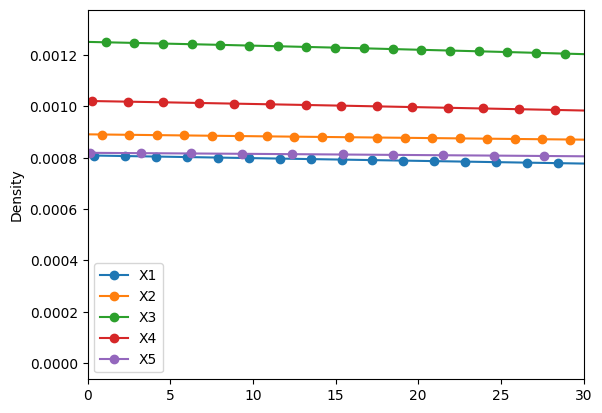

In [6]:
first_batch_.plot(marker='o',kind='kde')
plt.xlim(0,30)

<AxesSubplot: ylabel='Density'>

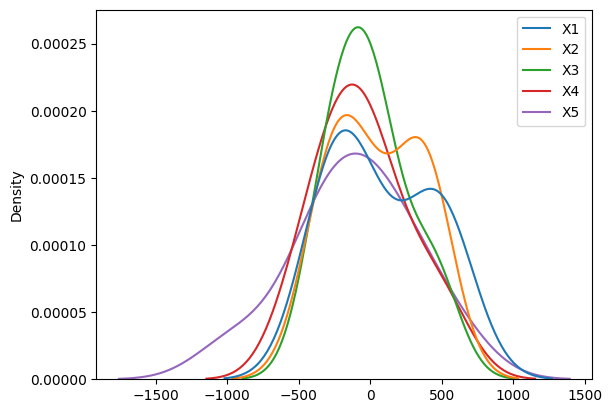

In [7]:
sns.kdeplot(first_batch_)

<AxesSubplot: >

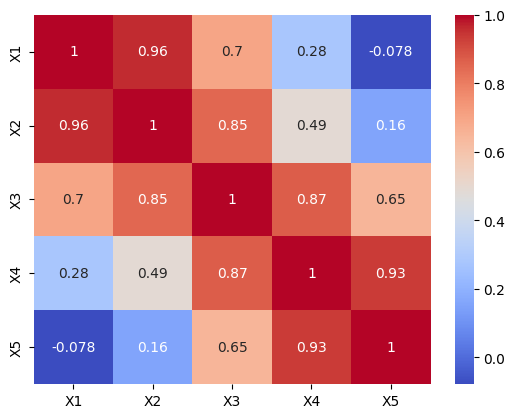

In [8]:
sns.heatmap(first_batch_.corr(),annot=True,cmap='coolwarm')

In [9]:
start_node = []
weight = []
end_node = []
for j in range(len(first_batch_)):
    for i in range(len(first_batch_.columns)-1):
        print(f"{first_batch_.columns[i]}--({first_batch_[first_batch_.columns[i]].iloc[j]})-->{first_batch_.columns[i+1]}")
        start_node.append(first_batch_.columns[i])
        weight.append(first_batch_[first_batch_.columns[i]].iloc[j])
        end_node.append(first_batch_.columns[i+1])
    start_node.append(first_batch_.columns[4])
    weight.append(first_batch_[first_batch_.columns[4]].iloc[j])
    end_node.append(first_batch_.columns[0])
    print(f"{first_batch_.columns[4]}--({first_batch_[first_batch_.columns[4]].iloc[j]})-->{first_batch_.columns[0]}")

X1--(386)-->X2
X2--(382)-->X3
X3--(356)-->X4
X4--(331)-->X5
X5--(320)-->X1
X1--(-278)-->X2
X2--(-246)-->X3
X3--(-215)-->X4
X4--(-191)-->X5
X5--(-177)-->X1
X1--(-167)-->X2
X2--(-230)-->X3
X3--(-280)-->X4
X4--(-315)-->X5
X5--(-338)-->X1
X1--(410)-->X2
X2--(451)-->X3
X3--(491)-->X4
X4--(541)-->X5
X5--(581)-->X1
X1--(-264)-->X2
X2--(-189)-->X3
X3--(-117)-->X4
X4--(-45)-->X5
X5--(20)-->X1
X1--(-4)-->X2
X2--(40)-->X3
X3--(78)-->X4
X4--(123)-->X5
X5--(149)-->X1
X1--(593)-->X2
X2--(328)-->X3
X3--(88)-->X4
X4--(-106)-->X5
X5--(-456)-->X1
X1--(-340)-->X2
X2--(-381)-->X3
X3--(-376)-->X4
X4--(-336)-->X5
X5--(-275)-->X1
X1--(-31)-->X2
X2--(-10)-->X3
X3--(5)-->X4
X4--(9)-->X5
X5--(9)-->X1
X1--(512)-->X2
X2--(351)-->X3
X3--(-90)-->X4
X4--(-534)-->X5
X5--(-944)-->X1


In [10]:
print(len(start_node),len(weight),len(end_node))

50 50 50


In [11]:
def create_graph(dataframe):
    start_node = []
    end_node = []
    weights = []
    for j in range(len(dataframe)):
        for i in range(len(dataframe.columns)-1):
            start_node.append(dataframe.columns[i])
            weights.append(dataframe[dataframe.columns[i]].iloc[j])
            end_node.append(dataframe.columns[i+1])
        start_node.append(dataframe.columns[4])
        weights.append(dataframe[dataframe.columns[4]].iloc[j])
        end_node.append(dataframe.columns[0])
    return start_node,end_node,weights

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_df = pd.DataFrame(scaler.fit_transform(first_batch_),columns=first_batch_.columns)
scaler_df

,X1,X2,X3,X4,X5
0,0.895160,1.139114,1.399468,1.252108,1.058259
1,-1.058131,-1.013002,-0.807980,-0.453085,-0.161770
2,-0.731602,-0.958171,-1.059266,-0.858149,-0.556991
3,0.965761,1.375572,1.921369,1.938104,1.698958
4,-1.016947,-0.817667,-0.429119,0.023847,0.321823
5,-0.252104,-0.032899,0.324738,0.572644,0.638490
6,1.504093,0.954059,0.363398,-0.175419,-0.846656
7,-1.240516,-1.475639,-1.430396,-0.926749,-0.402340
8,-0.331530,-0.204245,0.042525,0.200246,0.294820
9,1.265815,1.032879,-0.324738,-1.573546,-2.044592


In [13]:
start_,end_,weight_ = create_graph(scaler_df)
print(len(start_),len(end_),len(weight_))

g_ = Graph.Graph()
g_.add_vertex("V1")
g_.add_vertex("V2")
g_.add_vertex("V3")
g_.add_vertex("V4")
g_.add_vertex("V5")

50 50 50


In [14]:
for i in range(0,len(start_)-1):
    g_.add_edge(start_[i],end_[i],weight_[i])
print("Graph: ")
for v in g_:
    for w in v.get_connection():
        vid = v.get_node()
        wid = w.get_node()
        print(f"({vid})--({v.get_weight(w)})-->({wid})",end="\n")

Graph: 
(X1)--(1.2658148649125371)-->(X2)
(X1)--(0.2948199568541)-->(X5)
(X2)--(1.2658148649125371)-->(X1)
(X2)--(1.0328786244142112)-->(X3)
(X3)--(1.0328786244142112)-->(X2)
(X3)--(-0.3247384931378204)-->(X4)
(X4)--(-0.3247384931378204)-->(X3)
(X4)--(-1.5735461446566437)-->(X5)
(X5)--(-1.5735461446566437)-->(X4)
(X5)--(0.2948199568541)-->(X1)


In [26]:
dijkstra(g_,g_.get_vertex("V1"))
target = g_.get_vertex("V5")
path = [target.get_node()]
shortest_.shortest(target,path)
print(f"Shortest path: {path}")

Shortest path: ['V5']
